<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/NoteBooks/Bitcoin_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data1 = pd.read_csv("/content/drive/MyDrive/bitcoin_feature_filtered_dataset.csv")
data2 = pd.read_csv("/content/drive/MyDrive/bitcoin_feature_filtered_dataset_normal1.csv")

In [15]:
data1.shape , data2.shape

((44594, 63), (46015, 63))

In [18]:
44594+ 46015

90609

In [16]:
import pandas as pd

# Assuming you have two DataFrames, df1 and df2
if all(data1.columns == data2.columns):
    concatenated_df = pd.concat([data1, data2], axis=0)
    concatenated_df.reset_index(drop=True, inplace=True)
else:
    print("DataFrames have different columns and cannot be concatenated.")


In [17]:
concatenated_df.shape

(90609, 63)

In [19]:
concatenated_df.columns

Index(['label', 'input_transaction_count', 'output_transaction_count',
       'input_value_mean', 'input_value_median', 'input_value_maximum',
       'input_value_minimum', 'input_value_25th_percentile',
       'input_value_75th_percentile', 'input_value_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum', 'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range', 'input_time_diff_mean',
       'input_time_diff_median', 'input_time_diff_maximum',
       'input_time_diff_minimum', 'input_time_diff_25th_percentile',
       'input_time_diff_75th_percentile', 'input_time_diff_range',
       'output_value_usd_mean', 'output_value_usd_median',
       'output_value_usd_maximum', 'output_value_usd_minimum',
       'output_value_usd_25th_percentile', 'output_value_usd_75th_percentile',
       'output_valu

In [20]:
concatenated_df['label'].value_counts()

0    57501
2    13857
3    11328
1     7923
Name: label, dtype: int64

In [22]:
df = concatenated_df.copy()

In [86]:
original_feature_names = ['input_transaction_count', 'output_transaction_count',
       'input_value_mean', 'input_value_median', 'input_value_maximum',
       'input_value_minimum', 'input_value_25th_percentile',
       'input_value_75th_percentile', 'input_value_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum', 'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range', 'input_time_diff_mean',
       'input_time_diff_median', 'input_time_diff_maximum',
       'input_time_diff_minimum', 'input_time_diff_25th_percentile',
       'input_time_diff_75th_percentile', 'input_time_diff_range',
       'output_value_usd_mean', 'output_value_usd_median',
       'output_value_usd_maximum', 'output_value_usd_minimum',
       'output_value_usd_25th_percentile', 'output_value_usd_75th_percentile',
       'output_value_usd_range', 'output_time_diff_mean',
       'output_time_diff_median', 'output_time_diff_maximum',
       'output_time_diff_minimum', 'output_time_diff_25th_percentile',
       'output_time_diff_75th_percentile', 'output_time_diff_range',
       'output_value_mean', 'output_value_median', 'output_value_maximum',
       'output_value_minimum', 'output_value_25th_percentile',
       'output_value_75th_percentile', 'output_value_range',
       'input_output_mean_ratio', 'input_output_max_ratio',
       'input_output_min_ratio', 'input_output_percentile_25_diff',
       'input_output_percentile_75_diff', 'range_mean_ratio_input',
       'range_mean_ratio_output', 'input_output_usd_mean_ratio',
       'input_output_usd_max_ratio', 'input_output_usd_min_ratio',
       'input_output_usd_percentile_25_diff',
       'input_output_usd_percentile_75_diff', 'input_range_mean_ratio',
       'output_range_mean_ratio', 'input_output_transaction_count_ratio',
       'input_output_maximum_transaction_value_diff',
       'input_output_minimum_transaction_value_diff',
       'input_output_time_diff_max_min_diff']

In [42]:

!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.9 MB/s eta 0:00:00


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import numpy as np
import shap
import matplotlib.pyplot as plt

In [54]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Scenario 1

In [23]:
## Scenario one

In [34]:
import pandas as pd

# Assuming df is your DataFrame and 'label' is the class column
# Separating the classes into individual datasets
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]
df_class_2 = df[df['label'] == 2]
df_class_3 = df[df['label'] == 3]

# Print the number of records in each class
print("Number of records in Class 0:", len(df_class_0))
print("Number of records in Class 1:", len(df_class_1))
print("Number of records in Class 2:", len(df_class_2))
print("Number of records in Class 3:", len(df_class_3))


Number of records in Class 0: 57501
Number of records in Class 1: 7923
Number of records in Class 2: 13857
Number of records in Class 3: 11328


In [37]:
# Allocate 90% of Class 0 to training and 10% to testing
train_class_0_size = int(0.9 * 57501)  # 90% of class 0 records for training
test_class_0_size = 57501 - train_class_0_size  # remaining class 0 records for testing

# Calculate remaining sizes for the training and test sets
total_train_size = int(0.8 * total_records)  # total training set size (80% of total records)
total_test_size = total_records - total_train_size  # total test set size (20% of total records)

remaining_train_size = total_train_size - train_class_0_size  # remaining space in training set
remaining_test_size = total_test_size - test_class_0_size  # remaining space in test set

# Distribute the remaining sizes equally among classes 1, 2, and 3
train_class_1_size = min(remaining_train_size // 3, 7923)
train_class_2_size = min(remaining_train_size // 3, 13857)
train_class_3_size = min(remaining_train_size // 3, 11328)

test_class_1_size = min(remaining_test_size // 3, 7923 - train_class_1_size)
test_class_2_size = min(remaining_test_size // 3, 13857 - train_class_2_size)
test_class_3_size = min(remaining_test_size // 3, 11328 - train_class_3_size)

# Output the final calculated sizes
print("Class 0 in Training set:", train_class_0_size, "and in Test set:", test_class_0_size)
print("Class 1 in Training set:", train_class_1_size, "and in Test set:", test_class_1_size)
print("Class 2 in Training set:", train_class_2_size, "and in Test set:", test_class_2_size)
print("Class 3 in Training set:", train_class_3_size, "and in Test set:", test_class_3_size)


Class 0 in Training set: 51750 and in Test set: 5751
Class 1 in Training set: 6912 and in Test set: 1011
Class 2 in Training set: 6912 and in Test set: 4123
Class 3 in Training set: 6912 and in Test set: 4123


In [56]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'label' is the class column
# Separating the classes
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]
df_class_2 = df[df['label'] == 2]
df_class_3 = df[df['label'] == 3]

# Sizes for each class in training and test sets
train_class_0_size = 51750
test_class_0_size = 5751
train_class_1_size = 6912
test_class_1_size = 1011
train_class_2_size = 6912
test_class_2_size = 4123
train_class_3_size = 6912
test_class_3_size = 4123

# Set a random seed for reproducibility
np.random.seed(1)

# Function to split a class into training and test sets
def split_class(df_class, train_size, test_size):
    train_class = df_class.sample(train_size)
    test_class = df_class.drop(train_class.index).sample(test_size)
    return train_class, test_class

# Split each class into training and test sets
train_class_0, test_class_0 = split_class(df_class_0, train_class_0_size, test_class_0_size)
train_class_1, test_class_1 = split_class(df_class_1, train_class_1_size, test_class_1_size)
train_class_2, test_class_2 = split_class(df_class_2, train_class_2_size, test_class_2_size)
train_class_3, test_class_3 = split_class(df_class_3, train_class_3_size, test_class_3_size)

# Combine to form the final training and test sets
train_set = pd.concat([train_class_0, train_class_1, train_class_2, train_class_3])
test_set = pd.concat([test_class_0, test_class_1, test_class_2, test_class_3])

# Shuffle the datasets
train_set = train_set.sample(frac=1, random_state=1).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=1).reset_index(drop=True)

# Extract features and labels
X_train = train_set.drop('label', axis=1)
y_train = train_set['label']
X_test = test_set.drop('label', axis=1)
y_test = test_set['label']

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 72486
Test set size: 15008


In [57]:
# Distribution of y_train as percentages
y_train_distribution = y_train.value_counts(normalize=True) * 100
print("y_train distribution (percentages):")
print(y_train_distribution)

# Distribution of y_test as percentages
y_test_distribution = y_test.value_counts(normalize=True) * 100
print("\ny_test distribution (percentages):")
print(y_test_distribution)


y_train distribution (percentages):
0    71.393097
2     9.535634
1     9.535634
3     9.535634
Name: label, dtype: float64

y_test distribution (percentages):
0    38.319563
3    27.472015
2    27.472015
1     6.736407
Name: label, dtype: float64


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=original_feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=original_feature_names)

Test Accuracy: 0.4992670575692964
Ensemble F1 score: 0.4241796471952532
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.98      0.61      5751
           1       0.76      0.40      0.52      1011
           2       0.84      0.09      0.16      4123
           3       0.94      0.26      0.41      4123

    accuracy                           0.50     15008
   macro avg       0.74      0.43      0.42     15008
weighted avg       0.71      0.50      0.42     15008



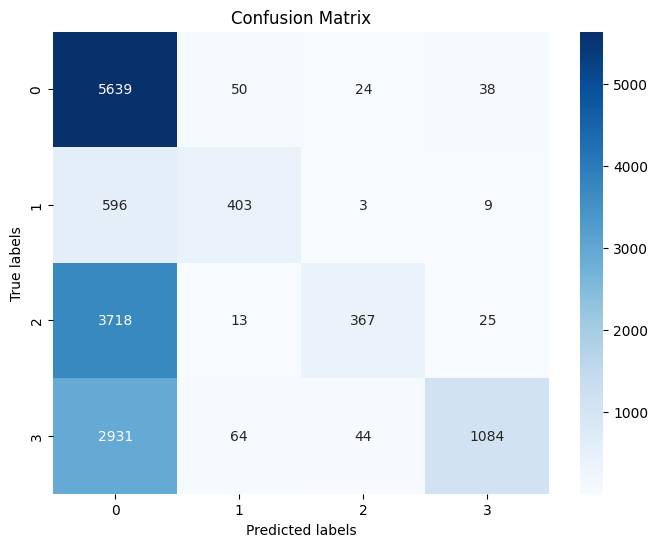

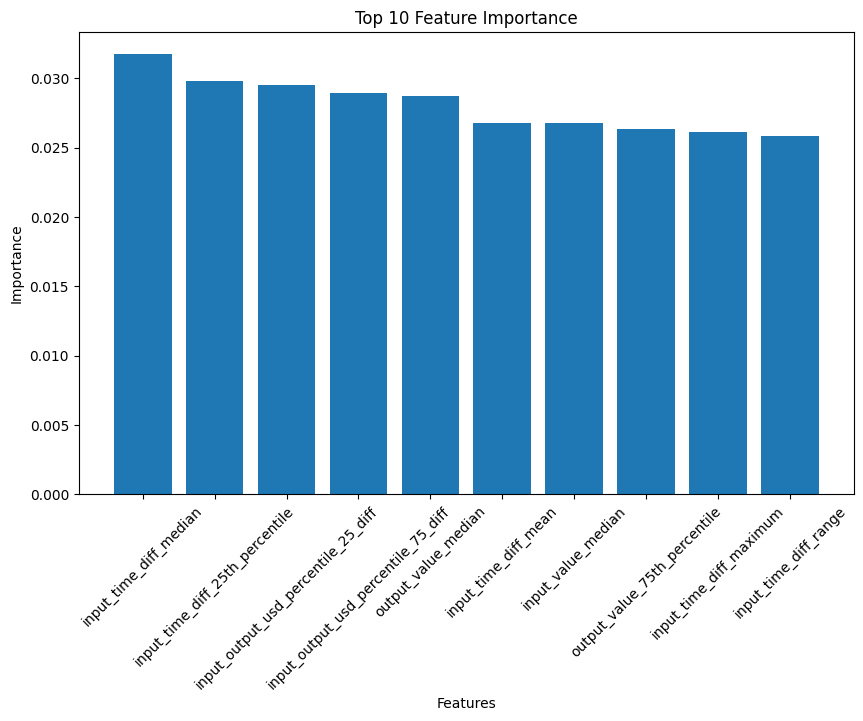

In [60]:
rf = RandomForestClassifier(max_depth=13, n_estimators=200, random_state=42)
rf.fit(X_train_scaled_df, y_train)

y_pred_test = rf.predict(X_test_scaled_df)

# Overall Test Accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

# F1 Score (weighted)
f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"Ensemble F1 score: {f1}")

# Classification Report for each class
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_labels = [0, 1, 2, 3]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (as you already have in your code)
feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[::-1][:10]  # Indices of top 10 features
top_features = X.columns[indices]
top_importances = feature_importance[indices]

plt.figure(figsize=(10, 6))  # Adjusted figure size
plt.bar(top_features, top_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.show()

In [64]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'label' is the class column
# Separating the classes
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]
df_class_2 = df[df['label'] == 2]
df_class_3 = df[df['label'] == 3]

# Set a random seed for reproducibility
np.random.seed(1)

# Sampling for training set
train_class_0 = df_class_0.sample(n=50000)
train_class_1 = df_class_1.sample(n=1666)  # Approximately 1/3 of 5000
train_class_2 = df_class_2.sample(n=1667)  # Approximately 1/3 of 5000
train_class_3 = df_class_3.sample(n=1667)  # Approximately 1/3 of 5000

# Combine to form the training set
train_set = pd.concat([train_class_0, train_class_1, train_class_2, train_class_3])

# Remove the training data from the datasets
df_class_0 = df_class_0.drop(train_class_0.index)
df_class_1 = df_class_1.drop(train_class_1.index)
df_class_2 = df_class_2.drop(train_class_2.index)
df_class_3 = df_class_3.drop(train_class_3.index)

# Sampling for test set
test_class_0 = df_class_0  # All remaining class 0 data
test_class_1 = df_class_1.sample(n=26)   # Approximately 1/3 of 834
test_class_2 = df_class_2.sample(n=26)   # Approximately 1/3 of 834
test_class_3 = df_class_3.sample(n=26)   # Approximately 1/3 of 834

# Combine to form the test set
test_set = pd.concat([test_class_0, test_class_1, test_class_2, test_class_3])

# Shuffle the datasets
train_set = train_set.sample(frac=1, random_state=1).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=1).reset_index(drop=True)

# Extract features and labels for both sets
X_train = train_set.drop('label', axis=1)
y_train = train_set['label']
X_test = test_set.drop('label', axis=1)
y_test = test_set['label']

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 55000
Test set size: 7579


In [50]:
test_class_0.shape

(7501, 63)

In [65]:
y_test.value_counts()

0    7501
2      26
1      26
3      26
Name: label, dtype: int64

In [66]:
y_train_distribution = y_train.value_counts(normalize=True) * 100
print("y_train distribution (percentages):")
print(y_train_distribution)

# Distribution of y_test as percentages
y_test_distribution = y_test.value_counts(normalize=True) * 100
print("\ny_test distribution (percentages):")
print(y_test_distribution)

y_train distribution (percentages):
0    90.909091
2     3.030909
3     3.030909
1     3.029091
Name: label, dtype: float64

y_test distribution (percentages):
0    98.970840
2     0.343053
1     0.343053
3     0.343053
Name: label, dtype: float64


Test Accuracy: 0.9905000659717641
Ensemble F1 score: 0.9869388950401761
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7501
           1       0.62      0.19      0.29        26
           2       0.00      0.00      0.00        26
           3       0.80      0.15      0.26        26

    accuracy                           0.99      7579
   macro avg       0.60      0.34      0.39      7579
weighted avg       0.99      0.99      0.99      7579



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


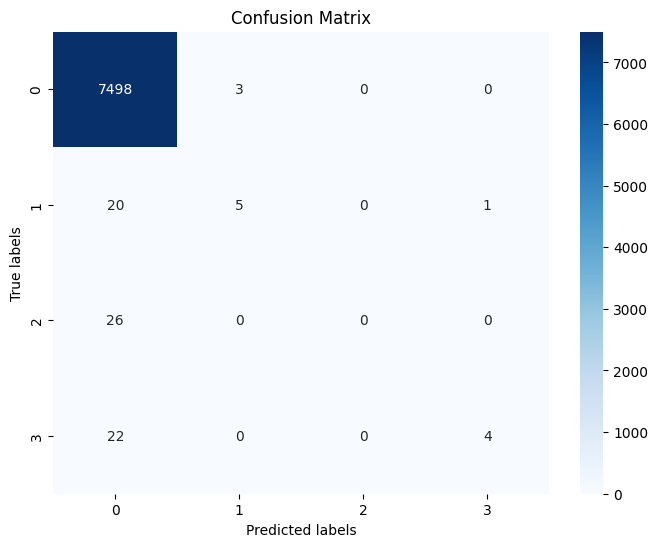

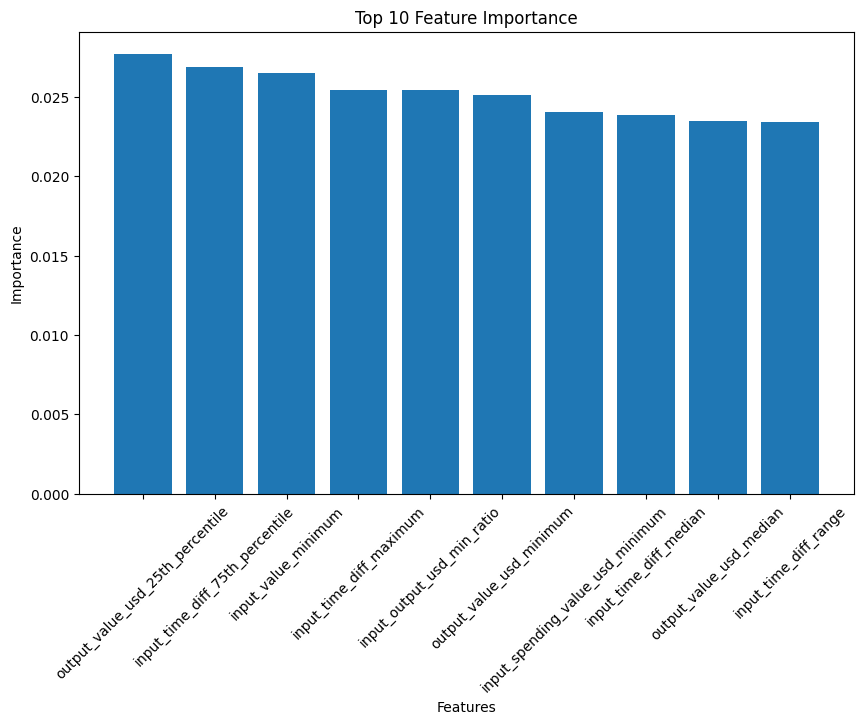

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=original_feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=original_feature_names)

rf = RandomForestClassifier(max_depth=13, n_estimators=200, random_state=42)
rf.fit(X_train_scaled_df, y_train)

y_pred_test = rf.predict(X_test_scaled_df)

# Overall Test Accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

# F1 Score (weighted)
f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"Ensemble F1 score: {f1}")

# Classification Report for each class
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_labels = [0, 1, 2, 3]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (as you already have in your code)
feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[::-1][:10]  # Indices of top 10 features
top_features = X.columns[indices]
top_importances = feature_importance[indices]

plt.figure(figsize=(10, 6))  # Adjusted figure size
plt.bar(top_features, top_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.show()

Create Test set first

In [92]:
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]
df_class_2 = df[df['label'] == 2]
df_class_3 = df[df['label'] == 3]

In [93]:


# Set a random seed for reproducibility
np.random.seed(1)

# Sampling for training set
test_class_0 = df_class_0.sample(n=17500)
test_class_1 = df_class_1.sample(n=100)
test_class_2 = df_class_2.sample(n=100)
test_class_3 = df_class_3.sample(n=100)

# Remove the training data from the datasets
df_class_0 = df_class_0.drop(test_class_0.index)
df_class_1 = df_class_1.drop(test_class_1.index)
df_class_2 = df_class_2.drop(test_class_2.index)
df_class_3 = df_class_3.drop(test_class_3.index)


test_set = pd.concat([test_class_0, test_class_1, test_class_2, test_class_3])
train_set = pd.concat([df_class_0, df_class_1, df_class_2, df_class_3])

In [151]:
y_test_distribution = test_set['label'].value_counts(normalize=True) * 100
print("\ny_test distribution (percentages):")
print(y_test_distribution)


y_test distribution (percentages):
0    98.314607
1     0.561798
2     0.561798
3     0.561798
Name: label, dtype: float64


In [152]:
y_train_distribution = train_set['label'].value_counts(normalize=True) * 100
print("\ny_train distribution (percentages):")
print(y_train_distribution)


y_train distribution (percentages):
0    54.939637
2    18.894642
3    15.421170
1    10.744551
Name: label, dtype: float64


In [94]:
test_set.to_csv('/content/drive/MyDrive/bitcoin_imbalance_test.csv', index=False)
train_set.to_csv('/content/drive/MyDrive/bitcoin_train.csv', index=False)

###Training Model

In [95]:
test = pd.read_csv("/content/drive/MyDrive/bitcoin_imbalance_test.csv")
train = pd.read_csv("/content/drive/MyDrive/bitcoin_train.csv")

In [96]:
train_class_0 = train[train['label'] == 0]
train_class_1 = train[train['label'] == 1]
train_class_2 = train[train['label'] == 2]
train_class_3 = train[train['label'] == 3]

avg_size = (len(train_class_1)+len(train_class_2)+len(train_class_3)) // 3

In [97]:
avg_size

10936

In [98]:
train_class_0 = train_class_0.sample(n=avg_size)

In [99]:
balanced_train_set = pd.concat([train_class_0, train_class_1, train_class_2, train_class_3])

In [100]:
balanced_train_set['label'].value_counts()

2    13757
3    11228
0    10936
1     7823
Name: label, dtype: int64

In [101]:
imbalanced_train_set = train

In [102]:
imbalanced_train_set['label'].value_counts()

0    40001
2    13757
3    11228
1     7823
Name: label, dtype: int64

In [103]:
balanced_train_set.to_csv('/content/drive/MyDrive/bitcoin_balance_train_set.csv', index=False)
imbalanced_train_set.to_csv('/content/drive/MyDrive/bitcoin_imbalance_train_set.csv', index=False)

In [104]:
# balanced_train_set = pd.read_csv("/content/drive/MyDrive/bitcoin_balance_train_set.csv")
# imbalanced_train_set = pd.read_csv("/content/drive/MyDrive/bitcoin_imbalance_train_set.csv")

In [110]:
def rf_training(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=original_feature_names)
  X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=original_feature_names)

  rf = RandomForestClassifier(max_depth=13, n_estimators=200, random_state=42)
  rf.fit(X_train_scaled_df, y_train)

  y_pred_test = rf.predict(X_test_scaled_df)

  # Overall Test Accuracy
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

  # F1 Score (weighted)
  f1 = f1_score(y_test, y_pred_test, average='macro')
  print(f"Ensemble F1 score: {f1}")

  # Classification Report for each class
  class_report = classification_report(y_test, y_pred_test)
  print("Classification Report:\n", class_report)

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred_test)
  class_labels = [0, 1, 2, 3]
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  # Feature Importance (as you already have in your code)
  feature_importance = rf.feature_importances_
  indices = np.argsort(feature_importance)[::-1][:10]  # Indices of top 10 features
  top_features = X.columns[indices]
  top_importances = feature_importance[indices]

  plt.figure(figsize=(10, 6))  # Adjusted figure size
  plt.bar(top_features, top_importances)
  plt.xlabel('Features')
  plt.ylabel('Importance')
  plt.title('Top 10 Feature Importance')
  plt.xticks(rotation=45)  # Rotate feature names for better visibility
  plt.show()

In [128]:
def rf_training_with_features(X_train, X_test, y_train, y_test, features=original_feature_names):
  X_train = X_train[features]
  X_test = X_test[features]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
  X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

  rf = RandomForestClassifier(max_depth=13, n_estimators=200, random_state=42)
  rf.fit(X_train_scaled_df, y_train)

  y_pred_test = rf.predict(X_test_scaled_df)

  # Overall Test Accuracy
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

  # F1 Score (weighted)
  f1 = f1_score(y_test, y_pred_test, average='macro')
  print(f"Ensemble F1 score: {f1}")

  # Classification Report for each class
  class_report = classification_report(y_test, y_pred_test)
  print("Classification Report:\n", class_report)

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred_test)
  class_labels = [0, 1, 2, 3]
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  # Feature Importance (as you already have in your code)
  feature_importance = rf.feature_importances_
  indices = np.argsort(feature_importance)[::-1][:10]  # Indices of top 10 features
  top_features = X.columns[indices]
  top_importances = feature_importance[indices]

  plt.figure(figsize=(10, 6))  # Adjusted figure size
  plt.bar(top_features, top_importances)
  plt.xlabel('Features')
  plt.ylabel('Importance')
  plt.title('Top 10 Feature Importance')
  plt.xticks(rotation=45)  # Rotate feature names for better visibility
  plt.show()

In [136]:
def rf_training_with_features_and_weights(X_train, X_test, y_train, y_test, features=original_feature_names):
  X_train = X_train[features]
  X_test = X_test[features]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
  X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

  class_weights = {0: 1, 1: 5, 2: 3, 3: 5}  # Example weights, adjust based on your specific needs
  rf = RandomForestClassifier(max_depth=13, n_estimators=200, random_state=42,  class_weight=class_weights)
  rf.fit(X_train_scaled_df, y_train)

  y_pred_test = rf.predict(X_test_scaled_df)

  # Overall Test Accuracy
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

  # F1 Score (weighted)
  f1 = f1_score(y_test, y_pred_test, average='macro')
  print(f"Ensemble F1 score: {f1}")

  # Classification Report for each class
  class_report = classification_report(y_test, y_pred_test)
  print("Classification Report:\n", class_report)

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred_test)
  class_labels = [0, 1, 2, 3]
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  # Feature Importance (as you already have in your code)
  feature_importance = rf.feature_importances_
  indices = np.argsort(feature_importance)[::-1][:10]  # Indices of top 10 features
  top_features = X.columns[indices]
  top_importances = feature_importance[indices]

  plt.figure(figsize=(10, 6))  # Adjusted figure size
  plt.bar(top_features, top_importances)
  plt.xlabel('Features')
  plt.ylabel('Importance')
  plt.title('Top 10 Feature Importance')
  plt.xticks(rotation=45)  # Rotate feature names for better visibility
  plt.show()

In [144]:
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def xgb_training_with_features_and_weights(X_train, X_test, y_train, y_test, features):
    X_train = X_train[features]
    X_test = X_test[features]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    class_weights = {
        0: 1,   # Example weights
        1: 10,
        2: 6,
        3: 10
    }

    # Apply weights to each sample
    weights = y_train.map(class_weights)

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train,  weight=weights)
    dtest = xgb.DMatrix(X_test_scaled, label=y_test)

    # Define XGBoost parameters (adjust as needed)
    params = {
        'max_depth': 13,
        'objective': 'multi:softmax',
        'num_class': 4,
        'eval_metric': 'mlogloss',
        'seed': 42
        # You can include scale_pos_weight here for binary classification
    }

    # Train the model
    xgb_model = xgb.train(params, dtrain, num_boost_round=200)

    # Predictions
    y_pred_test = xgb_model.predict(dtest)

    # Evaluation
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
    f1 = f1_score(y_test, y_pred_test, average='macro')
    print(f"Ensemble F1 score: {f1}")
    class_report = classification_report(y_test, y_pred_test)
    print("Classification Report:\n", class_report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Feature Importance
    feature_importance = xgb_model.get_fscore()
    sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:10]
    top_features, top_importances = zip(*sorted_importance)

    plt.figure(figsize=(10, 6))
    plt.bar(top_features, top_importances)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top 10 Feature Importance')
    plt.xticks(rotation=45)
    plt.show()


In [106]:
X_test = test[original_feature_names]
y_test = test['label']

In [107]:
test['label'].value_counts()

0    17500
1      100
2      100
3      100
Name: label, dtype: int64

Balance Set

Test Accuracy: 0.5923033707865168
Ensemble F1 score: 0.23159187860639865
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74     17500
           1       0.04      0.64      0.08       100
           2       0.02      0.86      0.04       100
           3       0.03      0.65      0.06       100

    accuracy                           0.59     17800
   macro avg       0.27      0.69      0.23     17800
weighted avg       0.98      0.59      0.73     17800



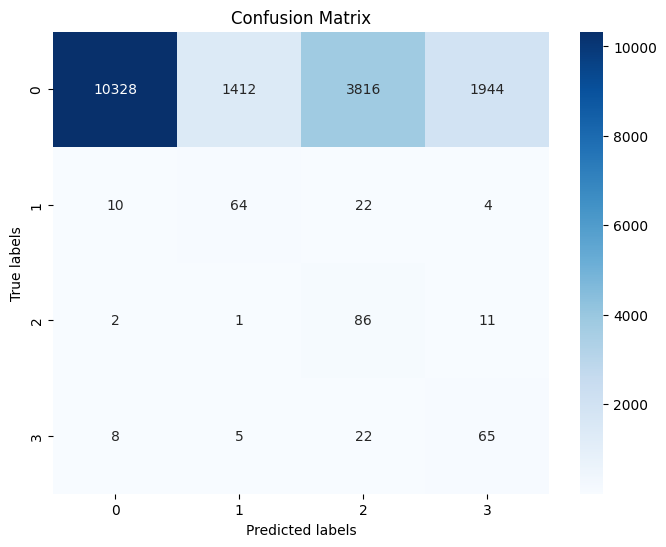

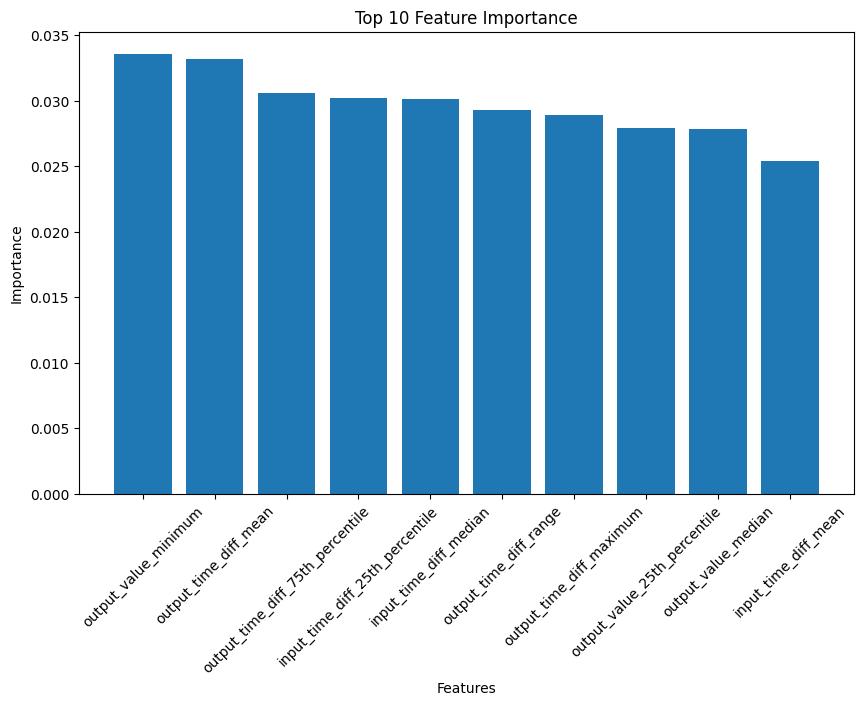

In [111]:
X_train = balanced_train_set[original_feature_names]
y_train = balanced_train_set['label']

rf_training(X_train, X_test, y_train, y_test)

Imbalance

Test Accuracy: 0.8214606741573034
Ensemble F1 score: 0.3259934688280583
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     17500
           1       0.15      0.49      0.24       100
           2       0.03      0.67      0.06       100
           3       0.06      0.49      0.11       100

    accuracy                           0.82     17800
   macro avg       0.31      0.62      0.33     17800
weighted avg       0.98      0.82      0.89     17800



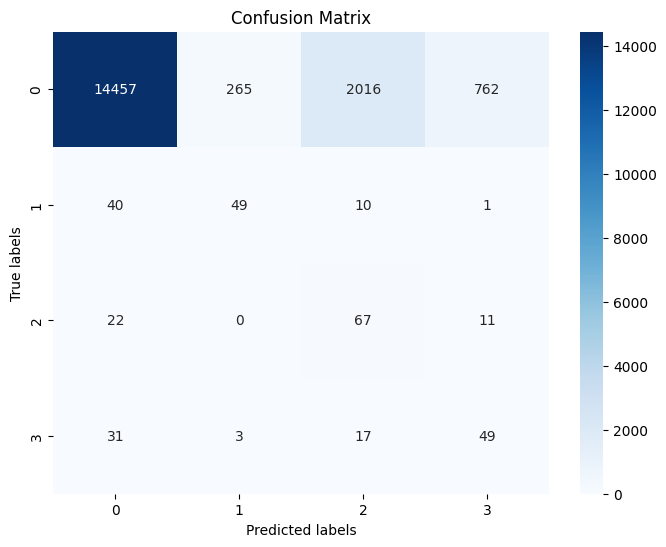

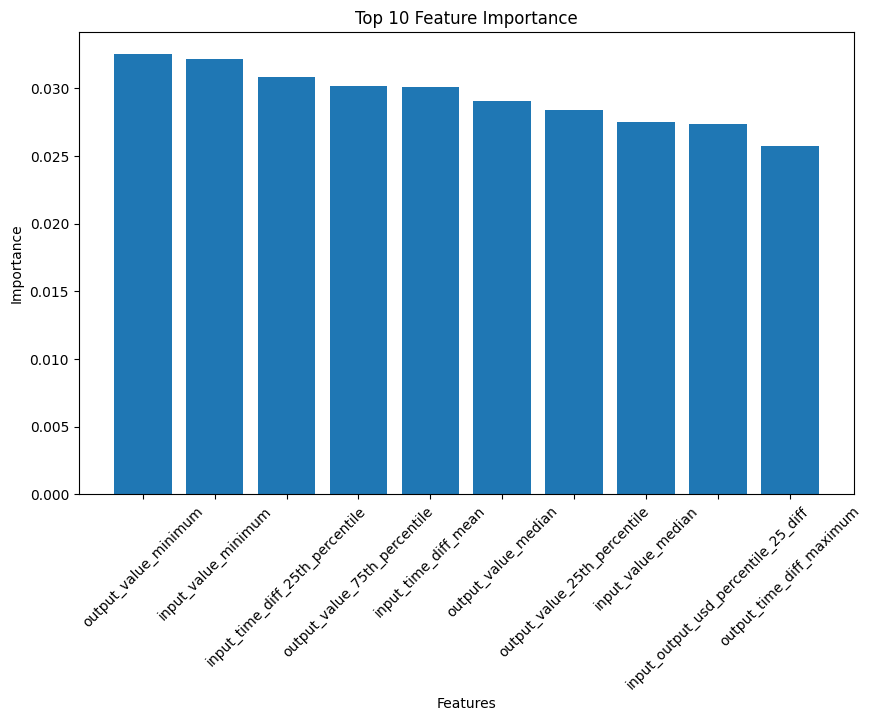

In [112]:
X_train = imbalanced_train_set[original_feature_names]
y_train = imbalanced_train_set['label']

rf_training(X_train, X_test, y_train, y_test)

Over Sampling


In [113]:
!pip install imbalanced-learn


In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
X_train = imbalanced_train_set[original_feature_names]
y_train = imbalanced_train_set['label']

In [116]:
# Initialize SMOTE
smote = SMOTE(random_state=1)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [117]:
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Class distribution after SMOTE:
 0    40001
1    40001
2    40001
3    40001
Name: label, dtype: int64


Test Accuracy: 0.6220786516853932
Ensemble F1 score: 0.23762612191690075
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77     17500
           1       0.04      0.67      0.08       100
           2       0.02      0.78      0.05       100
           3       0.03      0.64      0.06       100

    accuracy                           0.62     17800
   macro avg       0.27      0.68      0.24     17800
weighted avg       0.98      0.62      0.75     17800



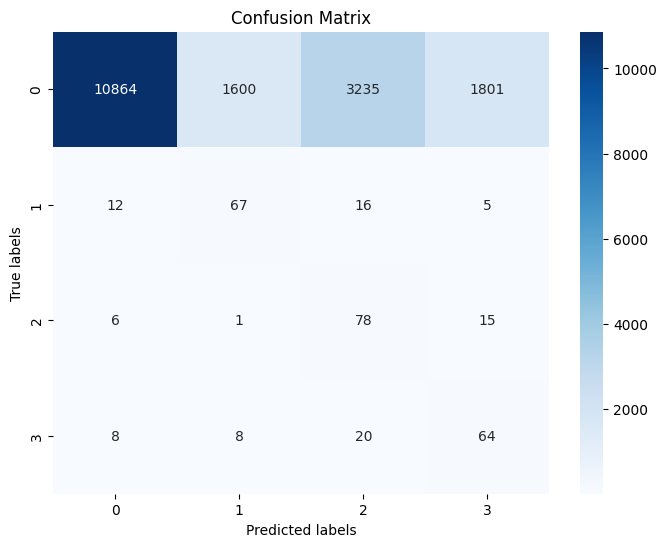

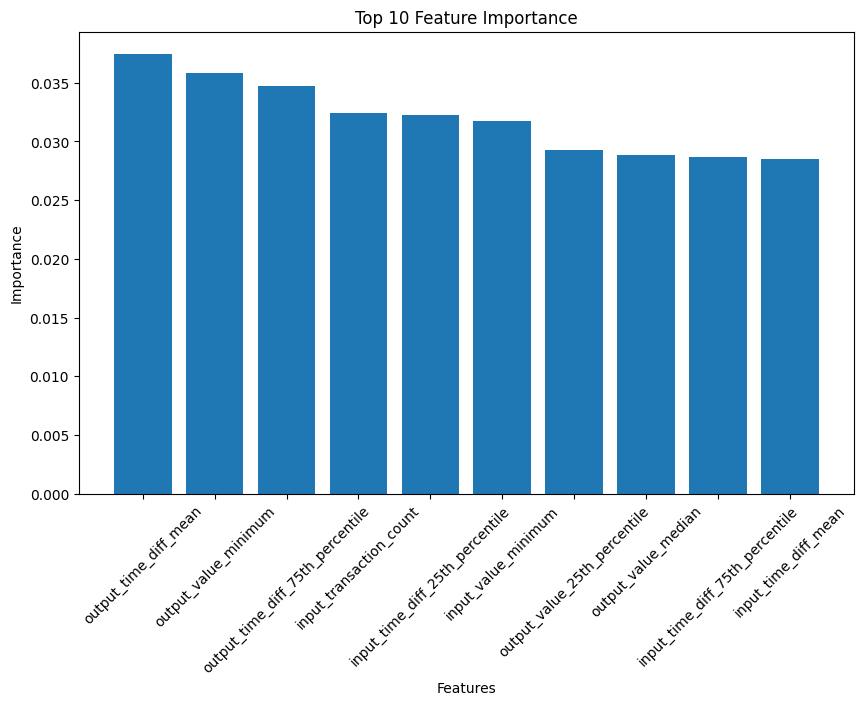

In [118]:
rf_training(X_train_smote, X_test, y_train_smote, y_test)

In [119]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=1)

# Apply undersampling to the training data
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Checking the new class distribution
print("Class distribution after undersampling:\n", y_train_under.value_counts())

Class distribution after undersampling:
 0    7823
1    7823
2    7823
3    7823
Name: label, dtype: int64


Test Accuracy: 0.5674157303370787
Ensemble F1 score: 0.21980426396081768
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.72     17500
           1       0.03      0.67      0.06       100
           2       0.02      0.78      0.04       100
           3       0.03      0.63      0.06       100

    accuracy                           0.57     17800
   macro avg       0.27      0.66      0.22     17800
weighted avg       0.98      0.57      0.71     17800



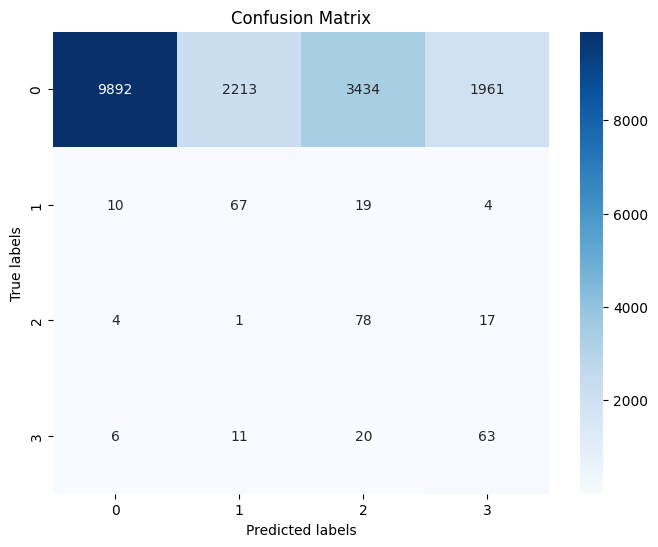

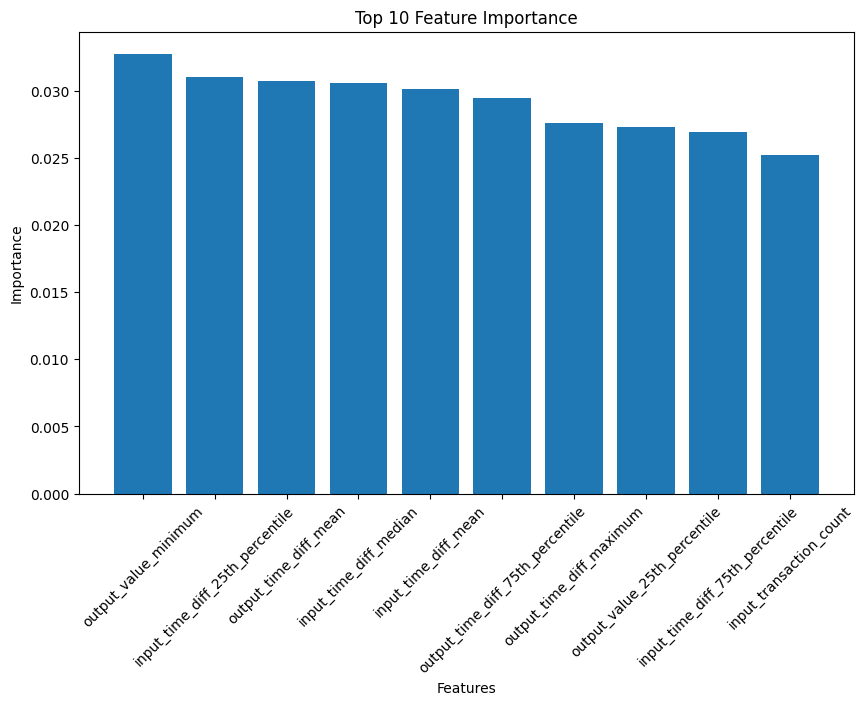

In [120]:
rf_training(X_train_under, X_test, y_train_under, y_test)

In [121]:
selected_cols = ['input_transaction_count',
 'input_value_mean',
 'input_value_median',
 'input_value_minimum',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_maximum',
 'input_time_diff_mean',
 'input_time_diff_median',
 'input_time_diff_25th_percentile',
 'input_time_diff_75th_percentile',
 'output_value_usd_median',
 'output_value_usd_maximum',
 'output_value_usd_minimum',
 'output_value_usd_75th_percentile',
 'output_time_diff_mean',
 'output_time_diff_median',
 'output_time_diff_maximum',
 'output_time_diff_75th_percentile',
 'output_time_diff_range',
 'output_value_mean',
 'output_value_median',
 'output_value_minimum',
 'output_value_25th_percentile',
 'output_value_75th_percentile',
 'input_output_usd_mean_ratio',
 'input_output_usd_percentile_25_diff',
 'input_output_usd_percentile_75_diff',
 'output_range_mean_ratio']

Test Accuracy: 0.8205056179775281
Ensemble F1 score: 0.3250230393983369
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     17500
           1       0.16      0.50      0.24       100
           2       0.03      0.66      0.06       100
           3       0.05      0.47      0.10       100

    accuracy                           0.82     17800
   macro avg       0.31      0.61      0.33     17800
weighted avg       0.98      0.82      0.89     17800



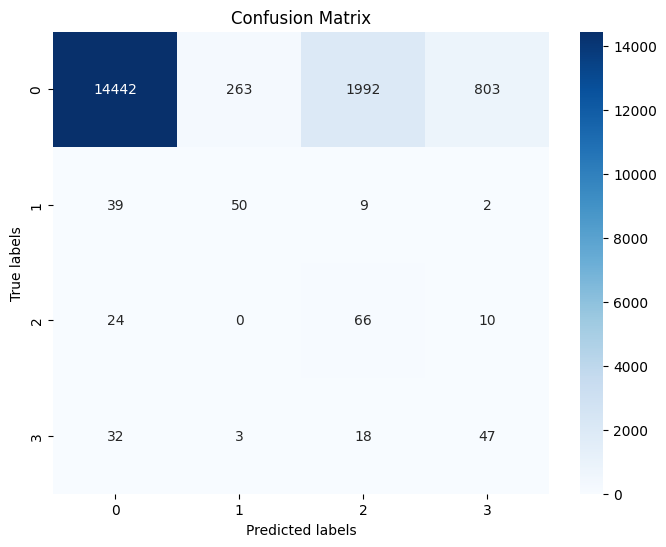

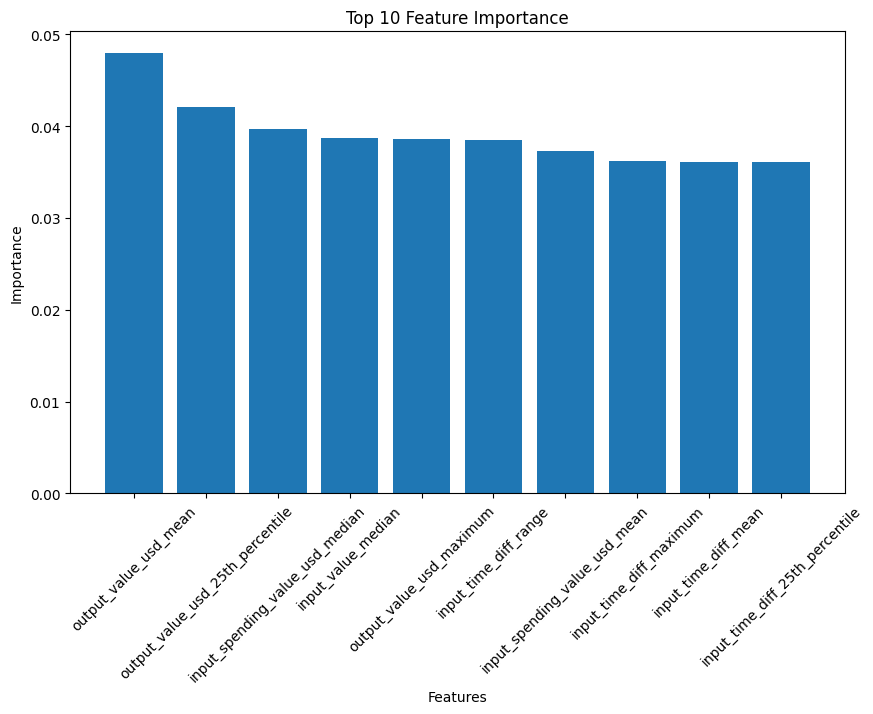

In [129]:
rf_training_with_features(X_train, X_test, y_train, y_test, selected_cols)


Test Accuracy: 0.612752808988764
Ensemble F1 score: 0.23319155825886634
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76     17500
           1       0.04      0.63      0.07       100
           2       0.02      0.78      0.05       100
           3       0.03      0.63      0.06       100

    accuracy                           0.61     17800
   macro avg       0.27      0.66      0.23     17800
weighted avg       0.98      0.61      0.75     17800



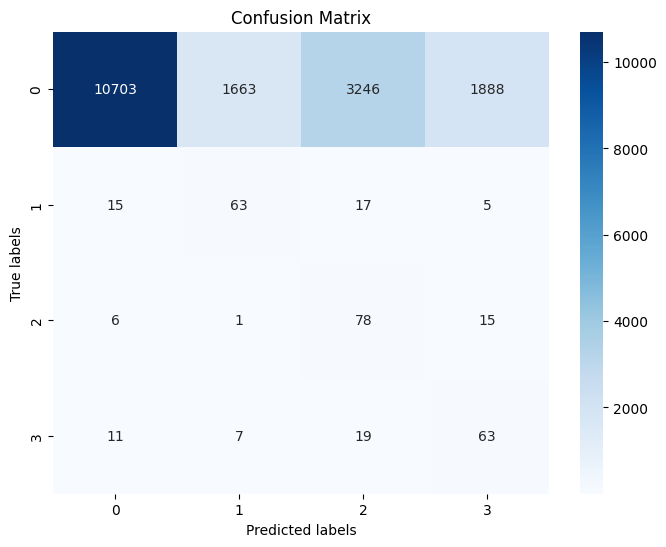

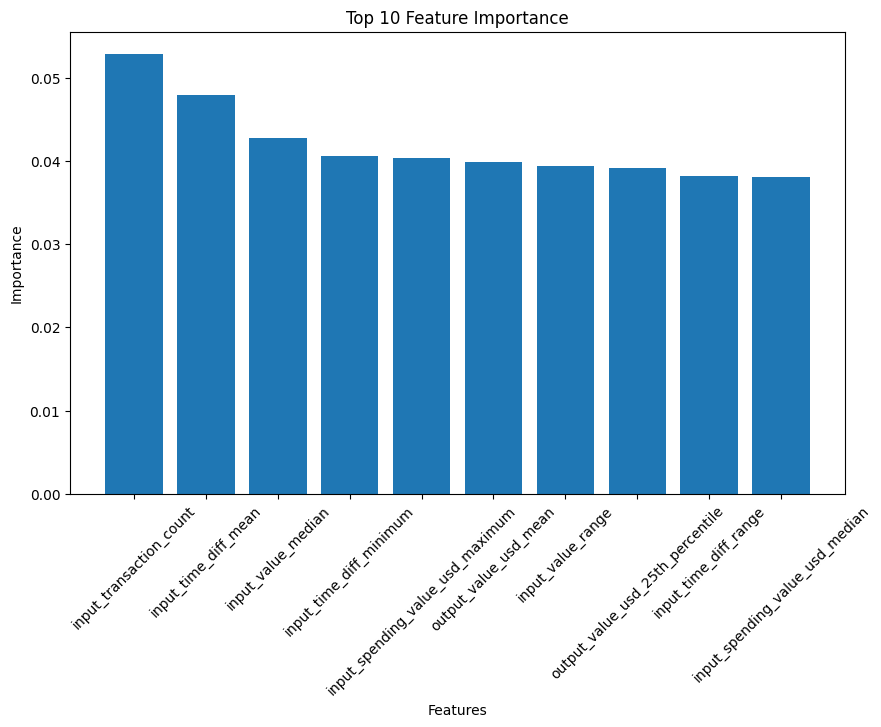

In [130]:
rf_training_with_features(X_train_smote, X_test, y_train_smote, y_test, selected_cols)

Test Accuracy: 0.5634269662921348
Ensemble F1 score: 0.21811095449771062
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72     17500
           1       0.03      0.67      0.06       100
           2       0.02      0.77      0.04       100
           3       0.03      0.62      0.06       100

    accuracy                           0.56     17800
   macro avg       0.27      0.66      0.22     17800
weighted avg       0.98      0.56      0.71     17800



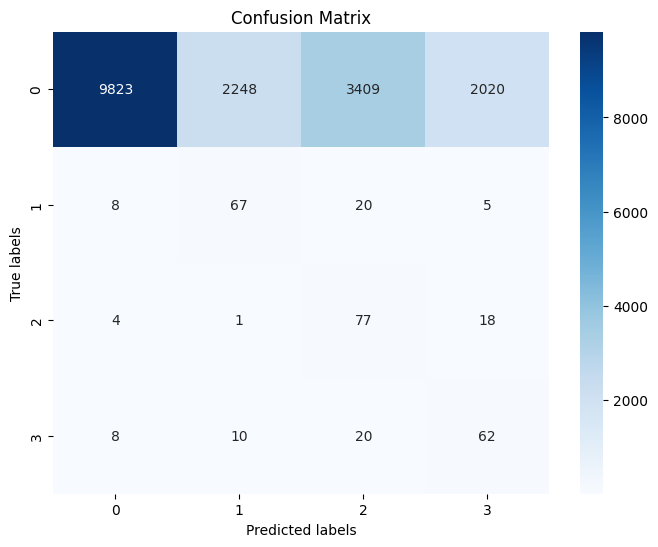

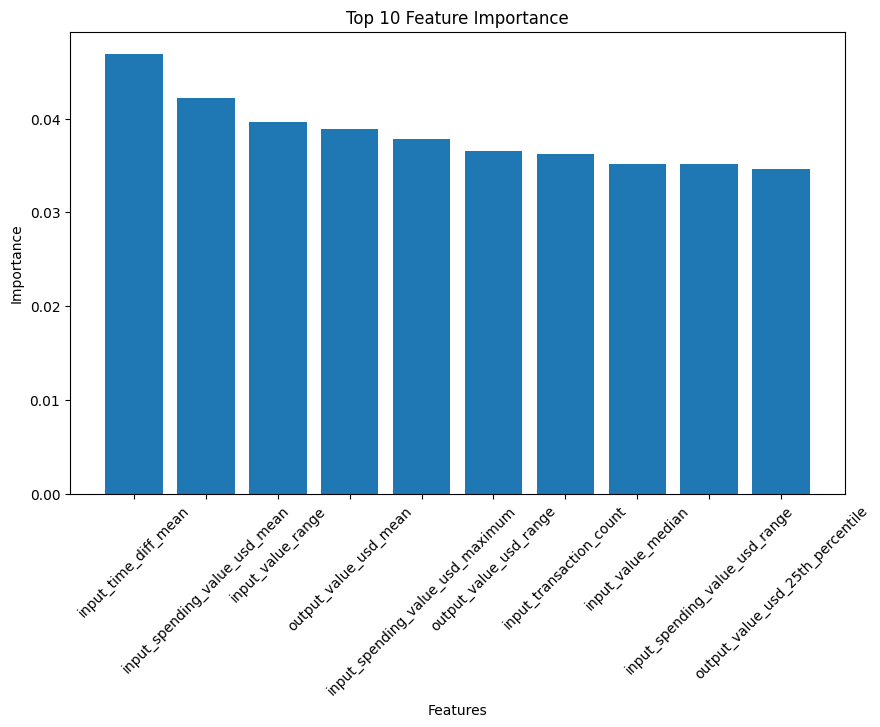

In [131]:
rf_training_with_features(X_train_under, X_test, y_train_under, y_test, selected_cols)

In [132]:
selected_cols1 = ['input_time_diff_mean', 'input_time_diff_maximum',
       'input_time_diff_25th_percentile', 'input_spending_value_usd_maximum',
       'input_spending_value_usd_mean', 'output_value_usd_mean',
       'input_spending_value_usd_median', 'input_value_minimum',
       'input_time_diff_range', 'input_spending_value_usd_range']

Test Accuracy: 0.8151685393258427
Ensemble F1 score: 0.30728405709145756
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     17500
           1       0.12      0.45      0.19       100
           2       0.03      0.65      0.05       100
           3       0.05      0.30      0.09       100

    accuracy                           0.82     17800
   macro avg       0.30      0.56      0.31     17800
weighted avg       0.98      0.82      0.89     17800



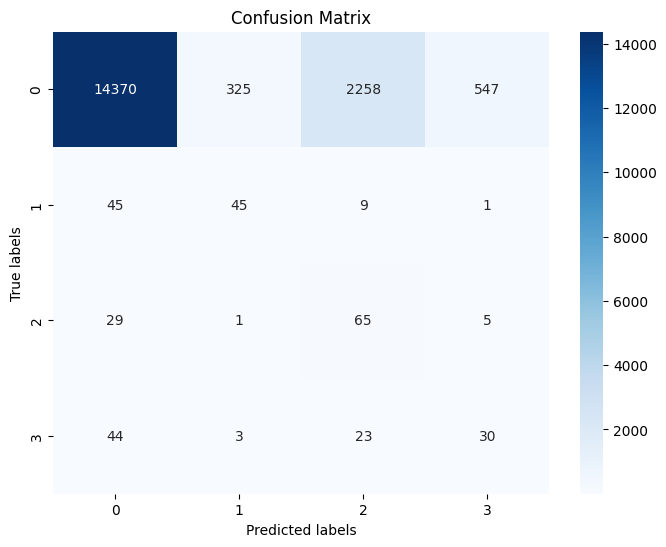

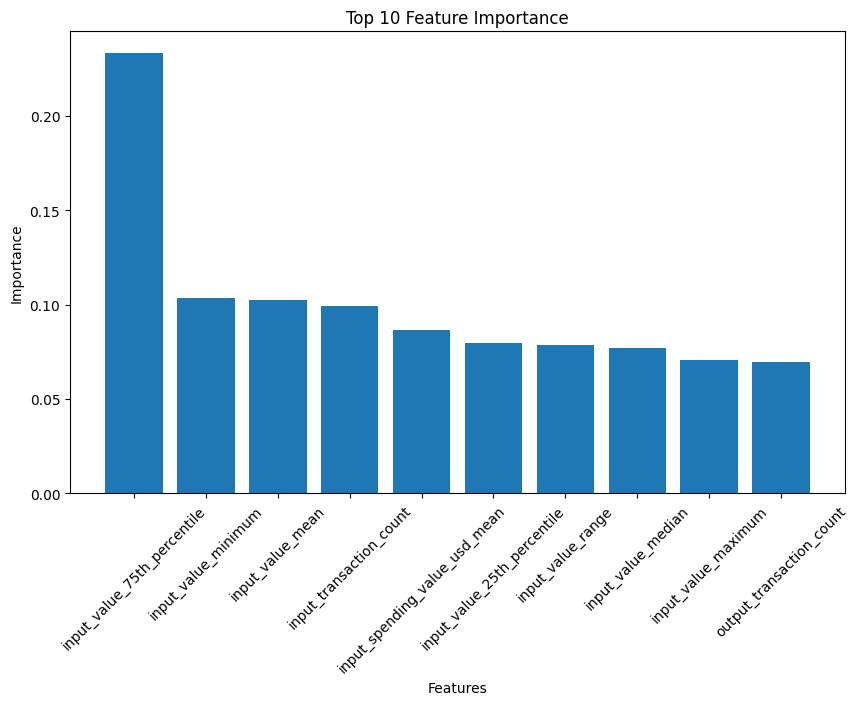

In [133]:
rf_training_with_features(X_train, X_test, y_train, y_test, selected_cols1)

Test Accuracy: 0.5462921348314607
Ensemble F1 score: 0.21259880439469508
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70     17500
           1       0.03      0.61      0.06       100
           2       0.02      0.77      0.04       100
           3       0.03      0.61      0.05       100

    accuracy                           0.55     17800
   macro avg       0.27      0.63      0.21     17800
weighted avg       0.98      0.55      0.69     17800



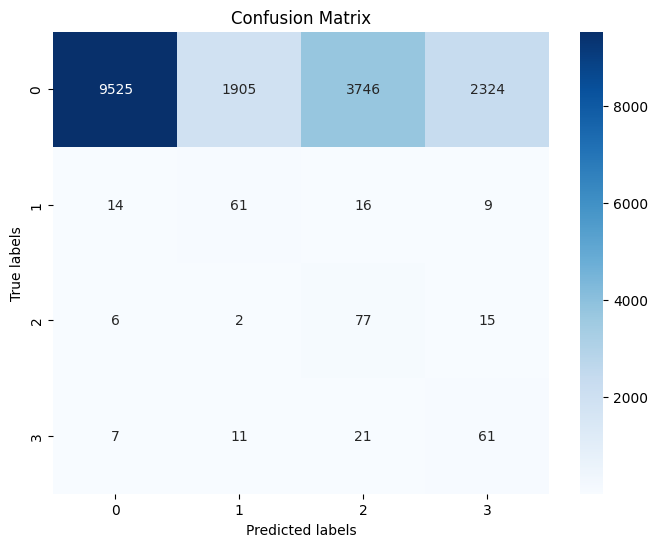

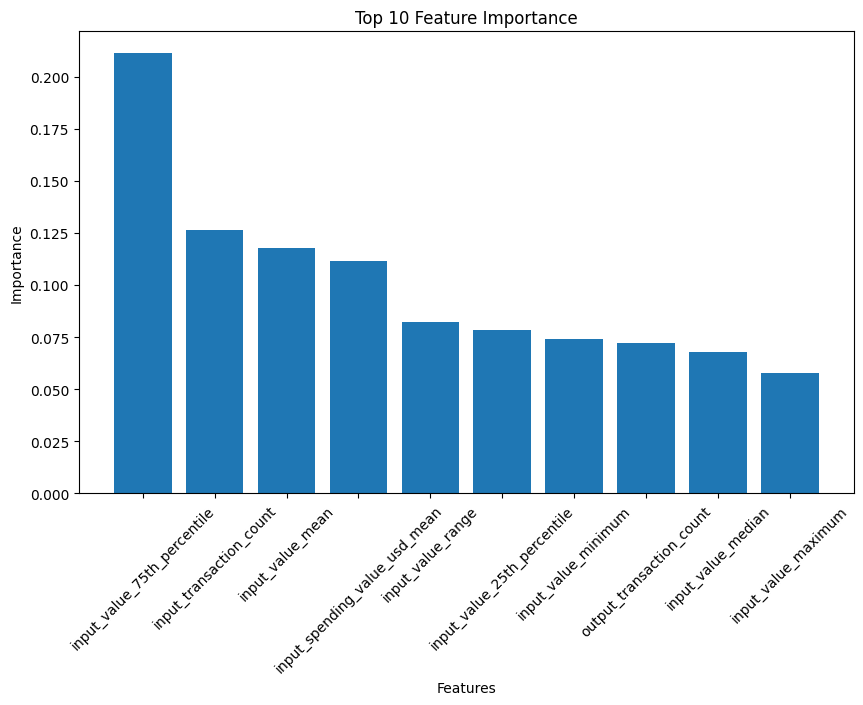

In [134]:
rf_training_with_features(X_train_smote, X_test, y_train_smote, y_test, selected_cols1)

Test Accuracy: 0.5147191011235955
Ensemble F1 score: 0.2027179990860032
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.68     17500
           1       0.03      0.63      0.05       100
           2       0.02      0.78      0.04       100
           3       0.02      0.58      0.04       100

    accuracy                           0.51     17800
   macro avg       0.27      0.63      0.20     17800
weighted avg       0.98      0.51      0.67     17800



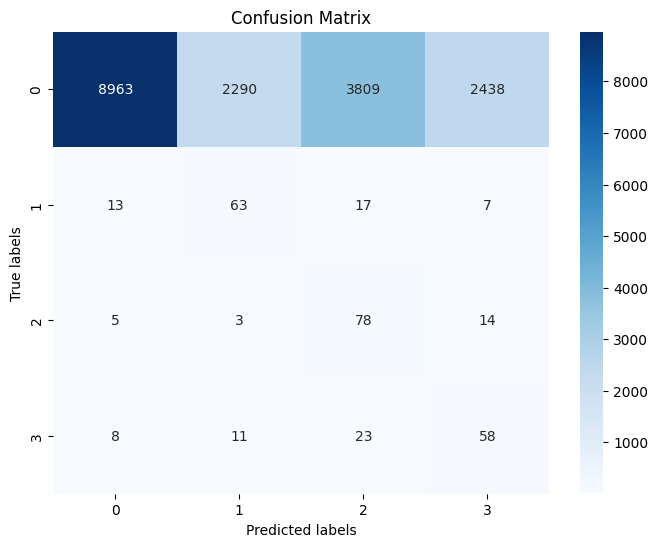

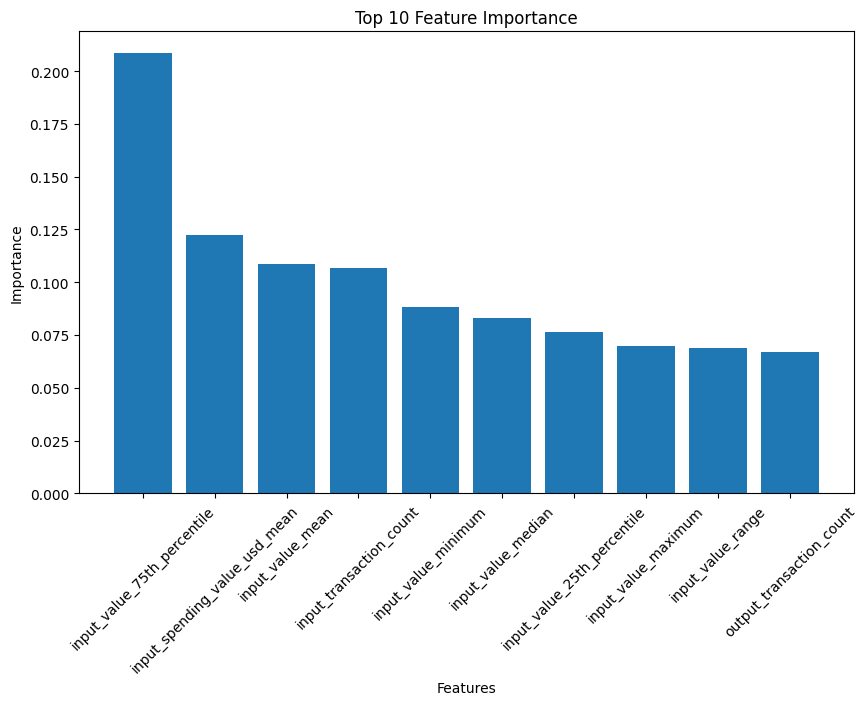

In [135]:
rf_training_with_features(X_train_under, X_test, y_train_under, y_test, selected_cols1)

with RF Weights

Test Accuracy: 0.6364044943820225
Ensemble F1 score: 0.24266964697135787
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78     17500
           1       0.05      0.61      0.09       100
           2       0.02      0.74      0.05       100
           3       0.03      0.68      0.06       100

    accuracy                           0.64     17800
   macro avg       0.27      0.67      0.24     17800
weighted avg       0.98      0.64      0.76     17800



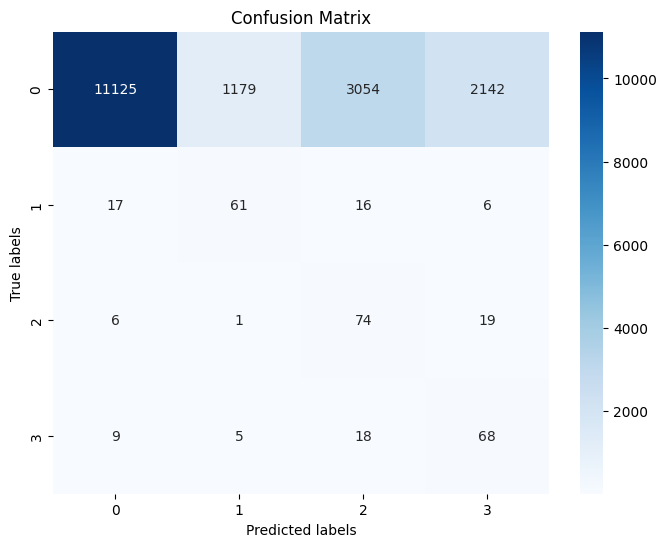

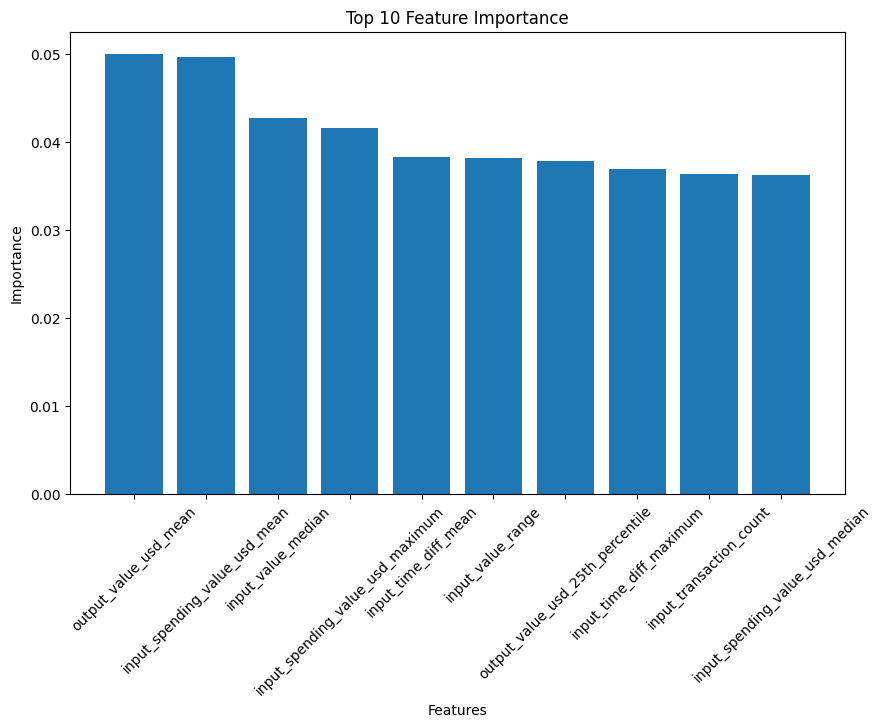

In [137]:
rf_training_with_features_and_weights(X_train, X_test, y_train, y_test, selected_cols)

Test Accuracy: 0.39747191011235955
Ensemble F1 score: 0.16973233881178323
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56     17500
           1       0.02      0.73      0.04       100
           2       0.02      0.70      0.04       100
           3       0.02      0.73      0.04       100

    accuracy                           0.40     17800
   macro avg       0.26      0.64      0.17     17800
weighted avg       0.98      0.40      0.55     17800



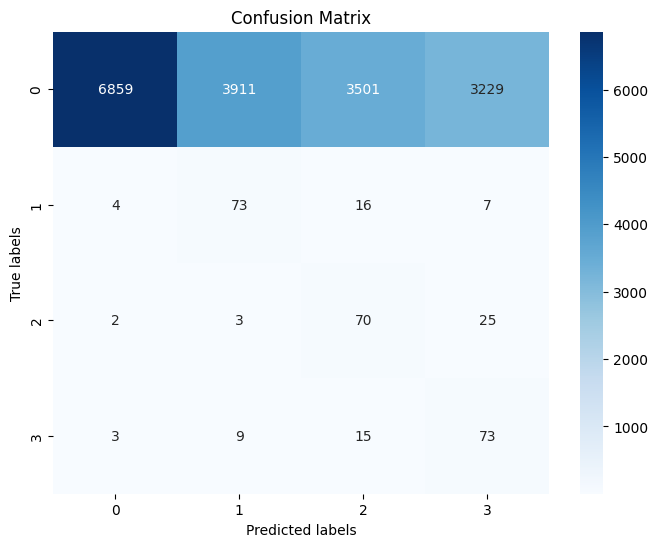

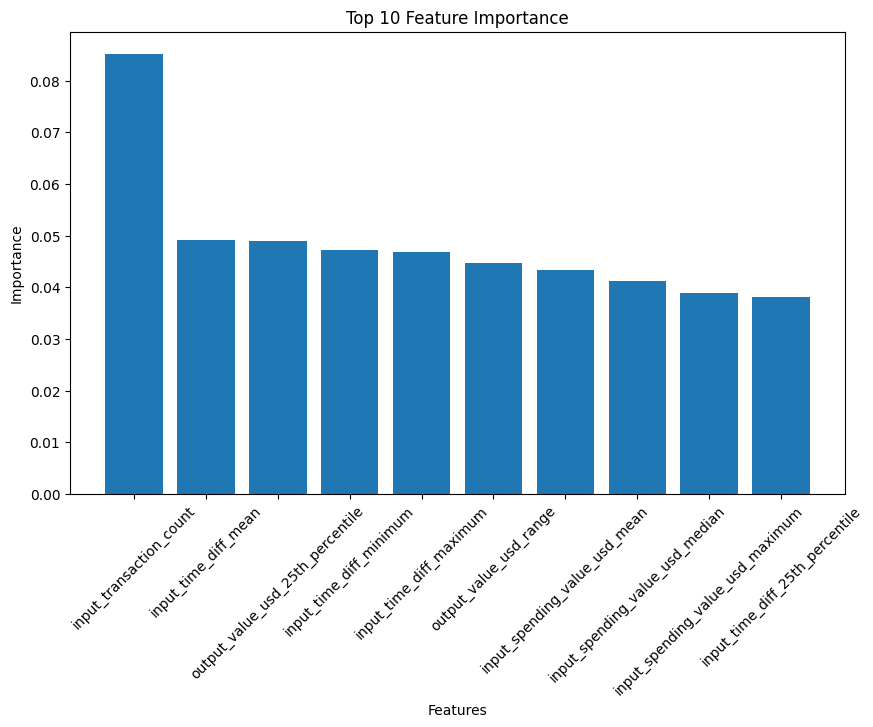

In [138]:
rf_training_with_features_and_weights(X_train_smote, X_test, y_train_smote, y_test, selected_cols)

Test Accuracy: 0.39258426966292137
Ensemble F1 score: 0.16890212790690393
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56     17500
           1       0.02      0.75      0.03       100
           2       0.02      0.72      0.04       100
           3       0.02      0.71      0.05       100

    accuracy                           0.39     17800
   macro avg       0.26      0.64      0.17     17800
weighted avg       0.98      0.39      0.55     17800



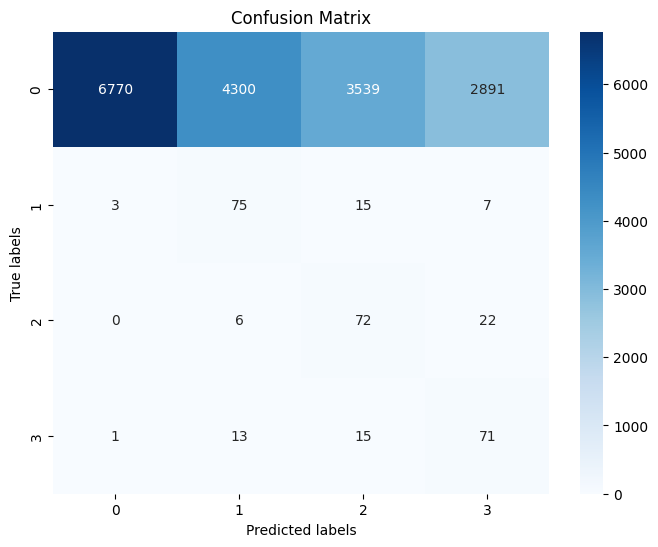

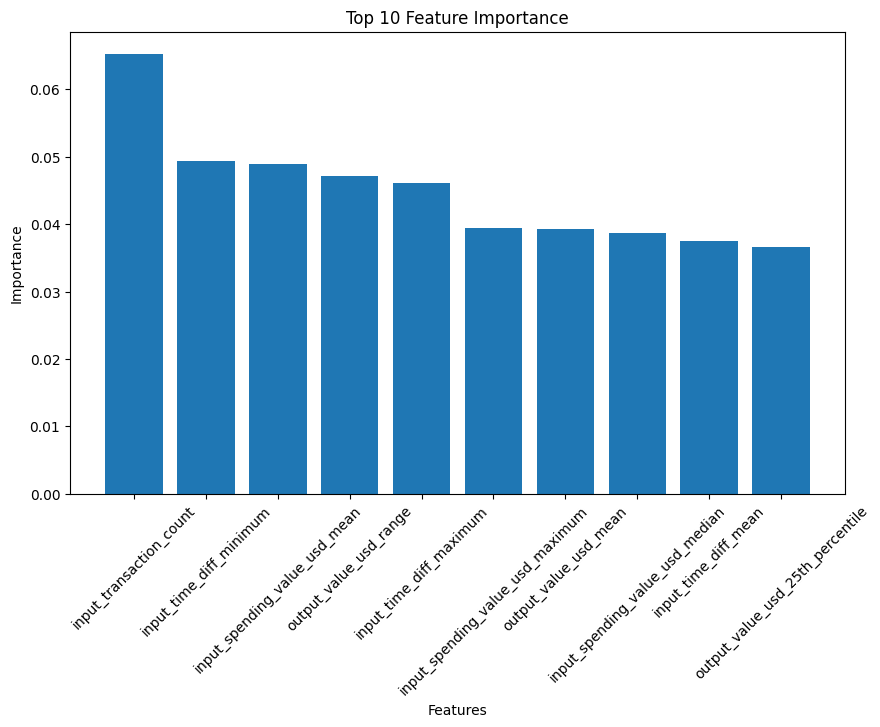

In [139]:
rf_training_with_features_and_weights(X_train_under, X_test, y_train_under, y_test, selected_cols)

Test Accuracy: 0.5797191011235955
Ensemble F1 score: 0.22505884369432894
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.73     17500
           1       0.05      0.56      0.09       100
           2       0.02      0.72      0.04       100
           3       0.02      0.65      0.04       100

    accuracy                           0.58     17800
   macro avg       0.27      0.63      0.23     17800
weighted avg       0.98      0.58      0.72     17800



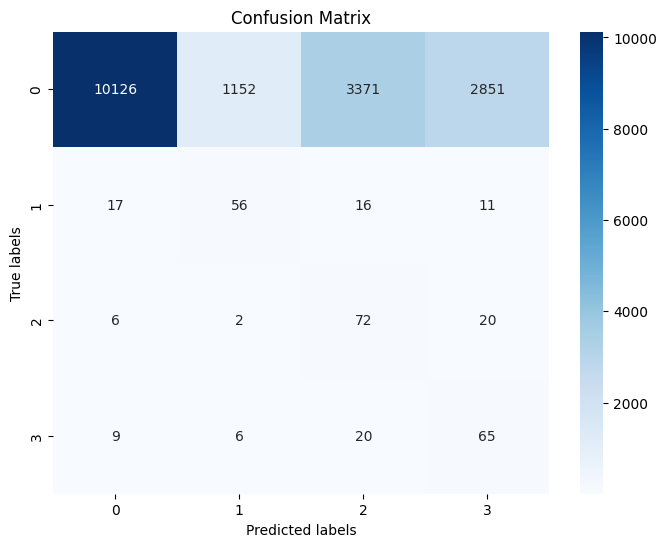

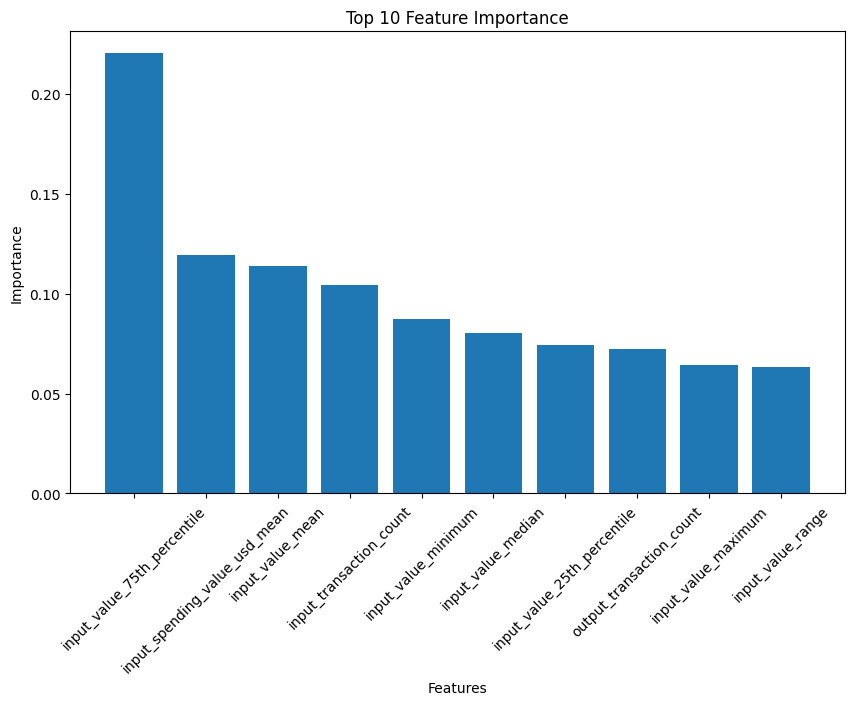

In [140]:
rf_training_with_features_and_weights(X_train, X_test, y_train, y_test, selected_cols1)

Test Accuracy: 0.3630898876404494
Ensemble F1 score: 0.15753740172410782
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53     17500
           1       0.02      0.71      0.04       100
           2       0.02      0.68      0.04       100
           3       0.02      0.65      0.03       100

    accuracy                           0.36     17800
   macro avg       0.26      0.60      0.16     17800
weighted avg       0.98      0.36      0.52     17800



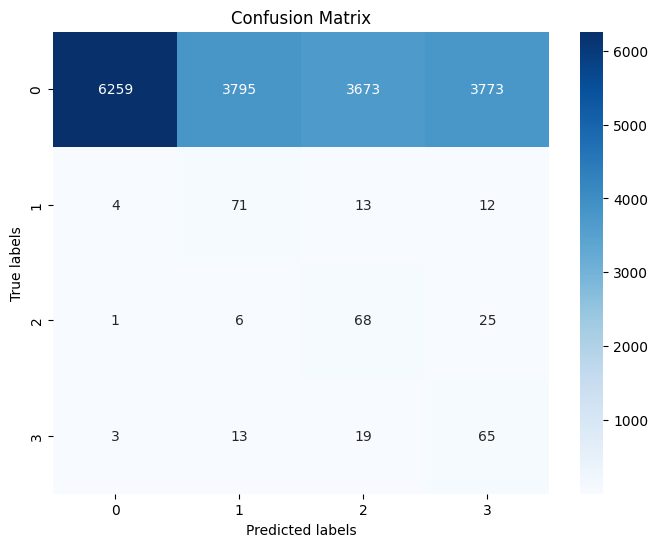

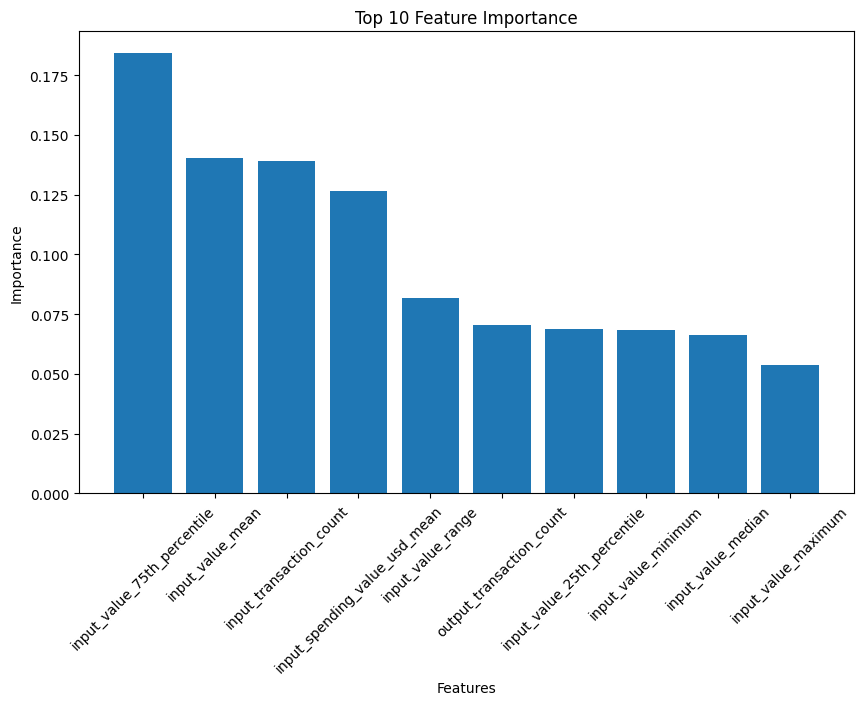

In [141]:
rf_training_with_features_and_weights(X_train_smote, X_test, y_train_smote, y_test, selected_cols1)

Test Accuracy: 0.3421910112359551
Ensemble F1 score: 0.1506176698690836
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.34      0.50     17500
           1       0.02      0.71      0.03       100
           2       0.02      0.67      0.03       100
           3       0.02      0.63      0.03       100

    accuracy                           0.34     17800
   macro avg       0.26      0.59      0.15     17800
weighted avg       0.98      0.34      0.50     17800



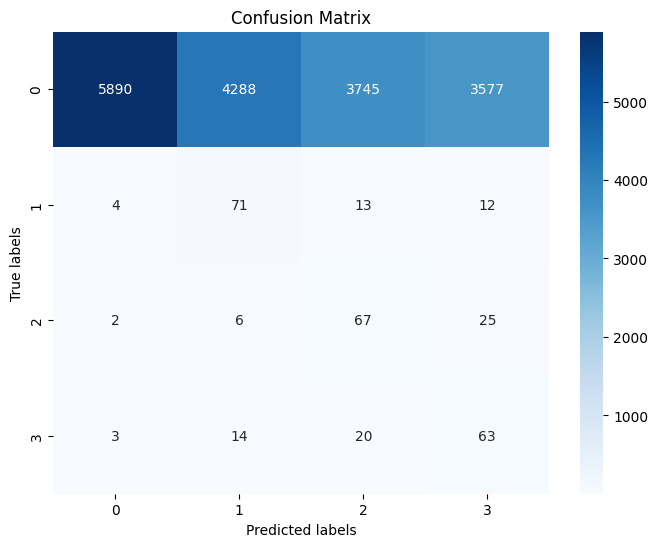

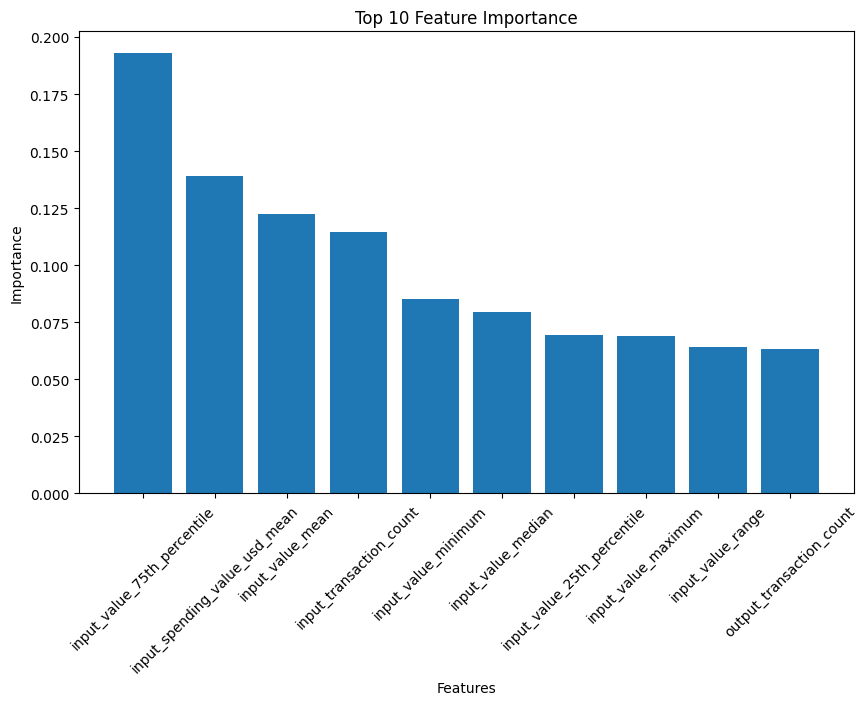

In [142]:
rf_training_with_features_and_weights(X_train_under, X_test, y_train_under, y_test, selected_cols1)

XGBoost

Test Accuracy: 0.7303370786516854
Ensemble F1 score: 0.2716635772908344
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84     17500
           1       0.06      0.61      0.11       100
           2       0.03      0.72      0.06       100
           3       0.04      0.59      0.07       100

    accuracy                           0.73     17800
   macro avg       0.28      0.66      0.27     17800
weighted avg       0.98      0.73      0.83     17800



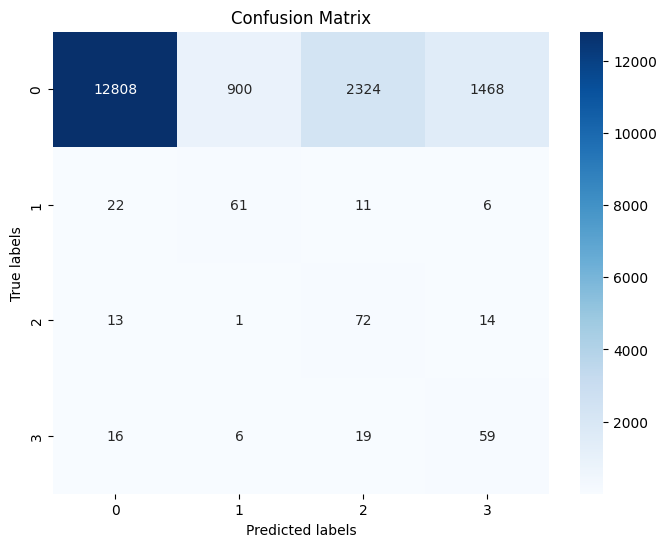

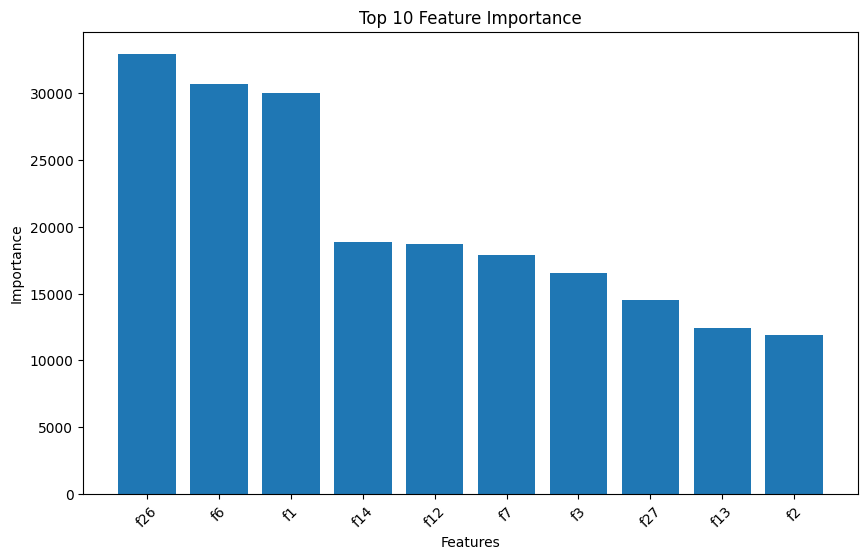

In [145]:
xgb_training_with_features_and_weights(X_train, X_test, y_train, y_test, selected_cols)

Test Accuracy: 0.6223033707865169
Ensemble F1 score: 0.23555771110668336
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77     17500
           1       0.04      0.70      0.07       100
           2       0.03      0.74      0.05       100
           3       0.03      0.65      0.06       100

    accuracy                           0.62     17800
   macro avg       0.27      0.68      0.24     17800
weighted avg       0.98      0.62      0.75     17800



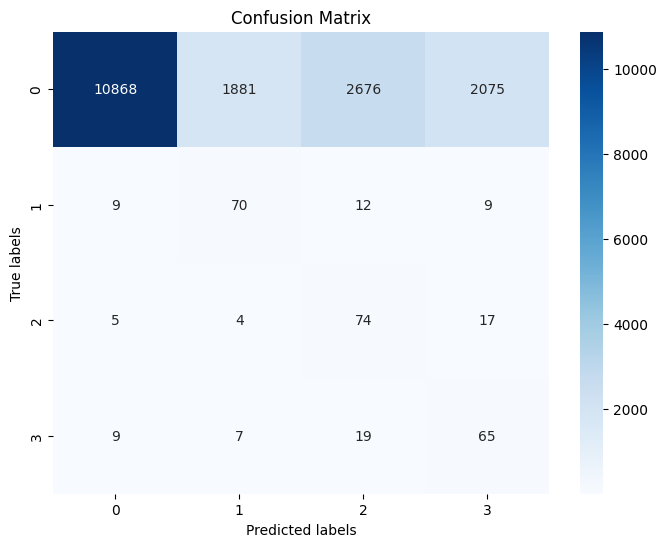

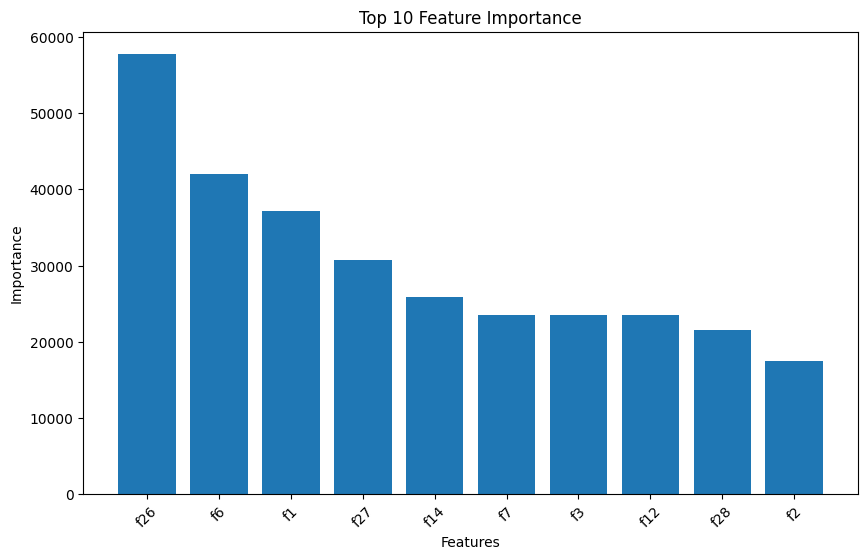

In [146]:
xgb_training_with_features_and_weights(X_train_smote, X_test, y_train_smote, y_test, selected_cols)

Test Accuracy: 0.5217415730337078
Ensemble F1 score: 0.20607661256366416
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.68     17500
           1       0.02      0.77      0.05       100
           2       0.02      0.69      0.05       100
           3       0.03      0.66      0.05       100

    accuracy                           0.52     17800
   macro avg       0.27      0.66      0.21     17800
weighted avg       0.98      0.52      0.67     17800



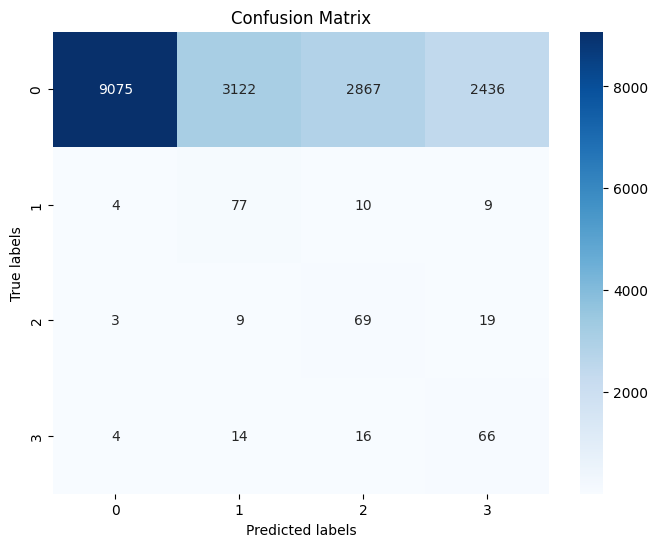

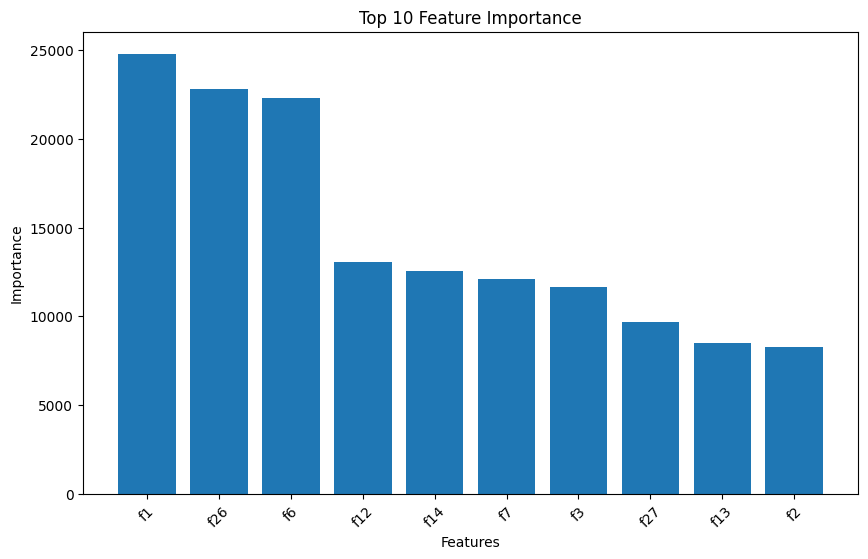

In [147]:
xgb_training_with_features_and_weights(X_train_under, X_test, y_train_under, y_test, selected_cols)

Test Accuracy: 0.6539325842696629
Ensemble F1 score: 0.24307872168804703
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79     17500
           1       0.04      0.62      0.08       100
           2       0.03      0.72      0.05       100
           3       0.03      0.59      0.05       100

    accuracy                           0.65     17800
   macro avg       0.27      0.65      0.24     17800
weighted avg       0.98      0.65      0.78     17800



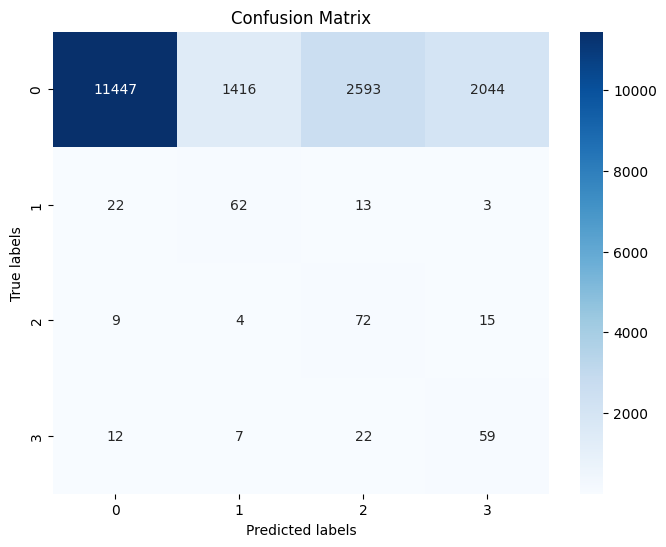

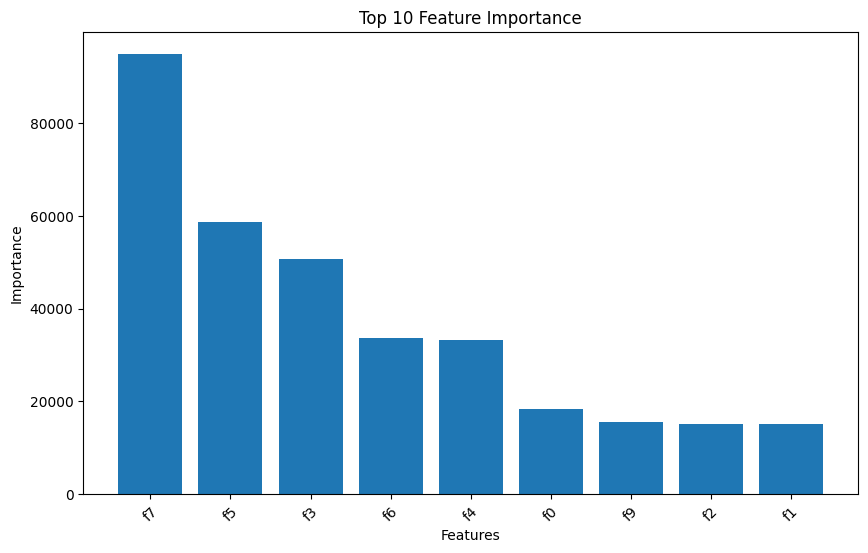

In [148]:
xgb_training_with_features_and_weights(X_train, X_test, y_train, y_test, selected_cols1)

Test Accuracy: 0.49219101123595504
Ensemble F1 score: 0.1952258707228865
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.66     17500
           1       0.02      0.66      0.04       100
           2       0.02      0.67      0.05       100
           3       0.02      0.63      0.04       100

    accuracy                           0.49     17800
   macro avg       0.27      0.61      0.20     17800
weighted avg       0.98      0.49      0.65     17800



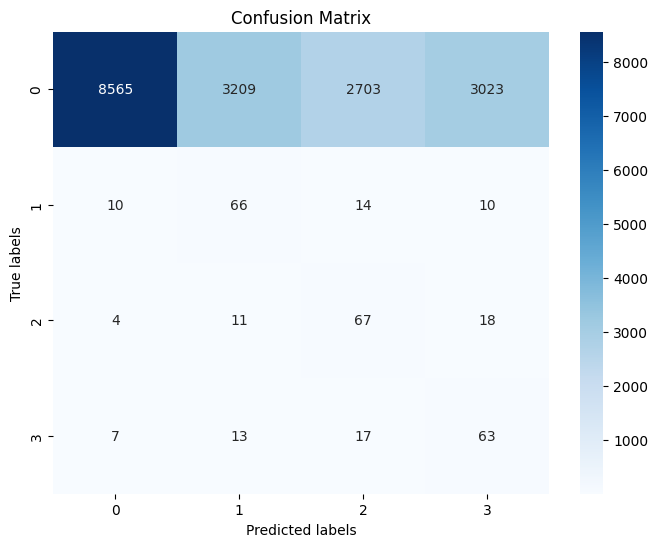

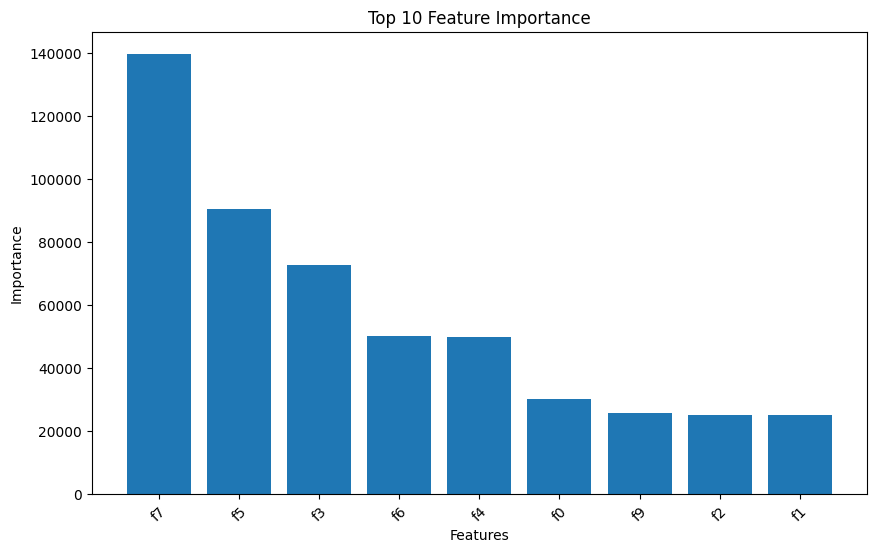

In [149]:
xgb_training_with_features_and_weights(X_train_smote, X_test, y_train_smote, y_test, selected_cols1)

Test Accuracy: 0.4439887640449438
Ensemble F1 score: 0.1800805000521582
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.44      0.61     17500
           1       0.02      0.70      0.04       100
           2       0.02      0.62      0.04       100
           3       0.02      0.55      0.03       100

    accuracy                           0.44     17800
   macro avg       0.26      0.58      0.18     17800
weighted avg       0.98      0.44      0.60     17800



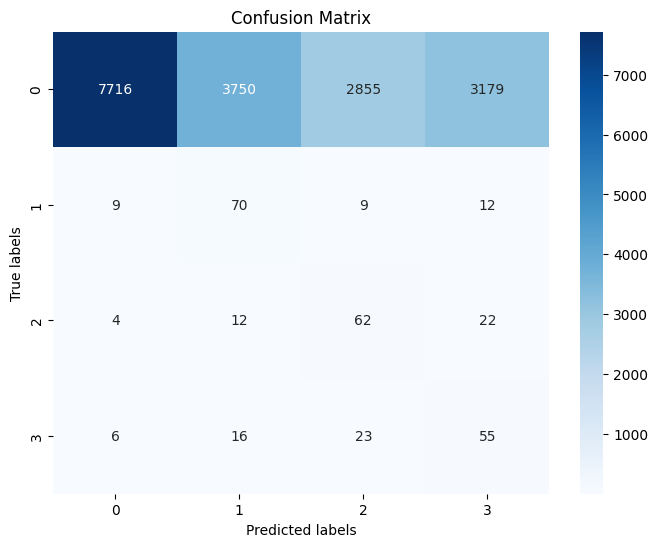

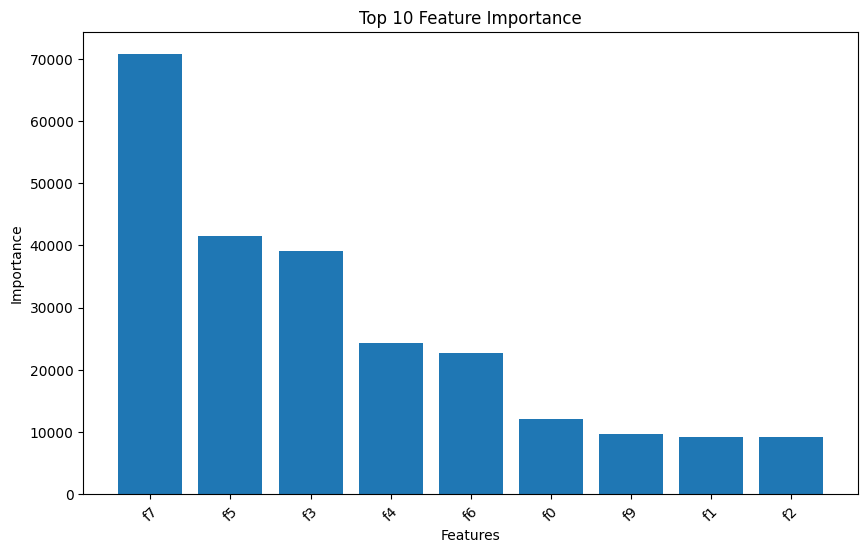

In [150]:
xgb_training_with_features_and_weights(X_train_under, X_test, y_train_under, y_test, selected_cols1)